<a href="https://colab.research.google.com/github/LuqmanXHakim/klasifikasi-gambar/blob/main/Luqman_Hakim_Submission_Akhir_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: Flowers Dataset
- **Nama:** Luqman Hakim
- **Email:** luqmanxhakim22042002@gmail.com
- **ID Dicoding:** 2608610

Sumber Dataset: https://www.kaggle.com/datasets/imsparsh/flowers-dataset

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 88.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 96.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2


In [2]:
# Mengimpor libraries umum yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm as tq

# Mengimpor libraries untuk visualisasi
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

# Mengimpor libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Mengimpor libraries untuk pembuatan dan evaluasi model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

# Mengabaikan peringatan
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.18.0


In [4]:
!pip freeze > requirements.txt

## Data Preparation

### Data Loading

In [5]:
# Import module yang disediakan google colab untuk kebutuhan upload file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"luqmanxhakim","key":"f1004de4ae554faba557434f84ffa49a"}'}

In [6]:
# Download kaggle dataset and unzip the file
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition
!mkdir -p /content/flowers-recognition
!unzip flowers-recognition.zip -d /content/flowers-recognition

Dataset URL: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition
License(s): unknown
 99% 223M/225M [00:11<00:00, 22.3MB/s]
100% 225M/225M [00:11<00:00, 19.7MB/s]
Archive:  flowers-recognition.zip
  inflating: /content/flowers-recognition/flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: /content/flowers-recognition/flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: /content/flowers-recognition/flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: /content/flowers-recognition/flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: /content/flowers-recognition/flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: /content/flowers-recognition/flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: /content/flowers-recognition/flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: /content/flowers-recognition/flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: /content/flowers-recognition/flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: /content/f

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Preprocessing

In [8]:
# Path dataset
dataset_dir = "/content/flowers-recognition/flowers"
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Analisis distribusi data
data_info = []
for flower in classes:
    folder_path = os.path.join(dataset_dir, flower)
    file_list = os.listdir(folder_path)
    data_info.extend([(flower, file) for file in file_list])

# Konversi data menjadi DataFrame
df = pd.DataFrame(data_info, columns=['class', 'filename'])

In [9]:
# Tampilkan beberapa baris awal
print("Preview dataset:")
print(df.head())

Preview dataset:
   class                      filename
0  daisy   2408024540_37f0be7cc0_n.jpg
1  daisy    19834392829_7d697871f6.jpg
2  daisy  16401288243_36112bd52f_m.jpg
3  daisy     2627815904_919373e7f5.jpg
4  daisy     6299498346_b9774b6500.jpg


In [10]:
# Informasi dataset
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     4317 non-null   object
 1   filename  4317 non-null   object
dtypes: object(2)
memory usage: 67.6+ KB
None


In [11]:
# Deskripsi statistik dataset
print("\nDeskripsi statistik dataset:")
print(df.describe())


Deskripsi statistik dataset:
            class                      filename
count        4317                          4317
unique          5                          4313
top     dandelion  17104364030_ee31ee279b_n.jpg
freq         1052                             2


In [12]:
# Cek missing values
missing_values = df.isnull().sum()
print("\nNilai hilang di setiap kolom:")
print(missing_values)


Nilai hilang di setiap kolom:
class       0
filename    0
dtype: int64


In [13]:
# Cek distribusi dataset
print("Distribusi dataset per kelas:")
print(df['class'].value_counts())

Distribusi dataset per kelas:
class
dandelion    1052
tulip         984
rose          784
daisy         764
sunflower     733
Name: count, dtype: int64


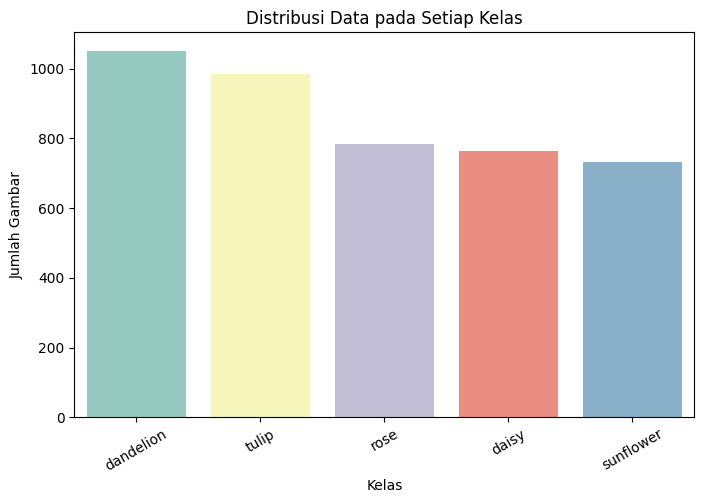

In [14]:
# Visualisasi distribusi label
data_count = df['class'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=data_count.index, y=data_count.values, palette='Set3')
plt.title('Distribusi Data pada Setiap Kelas')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=30)
plt.show()

### Visualisasi Gambar dari Setiap Kelas

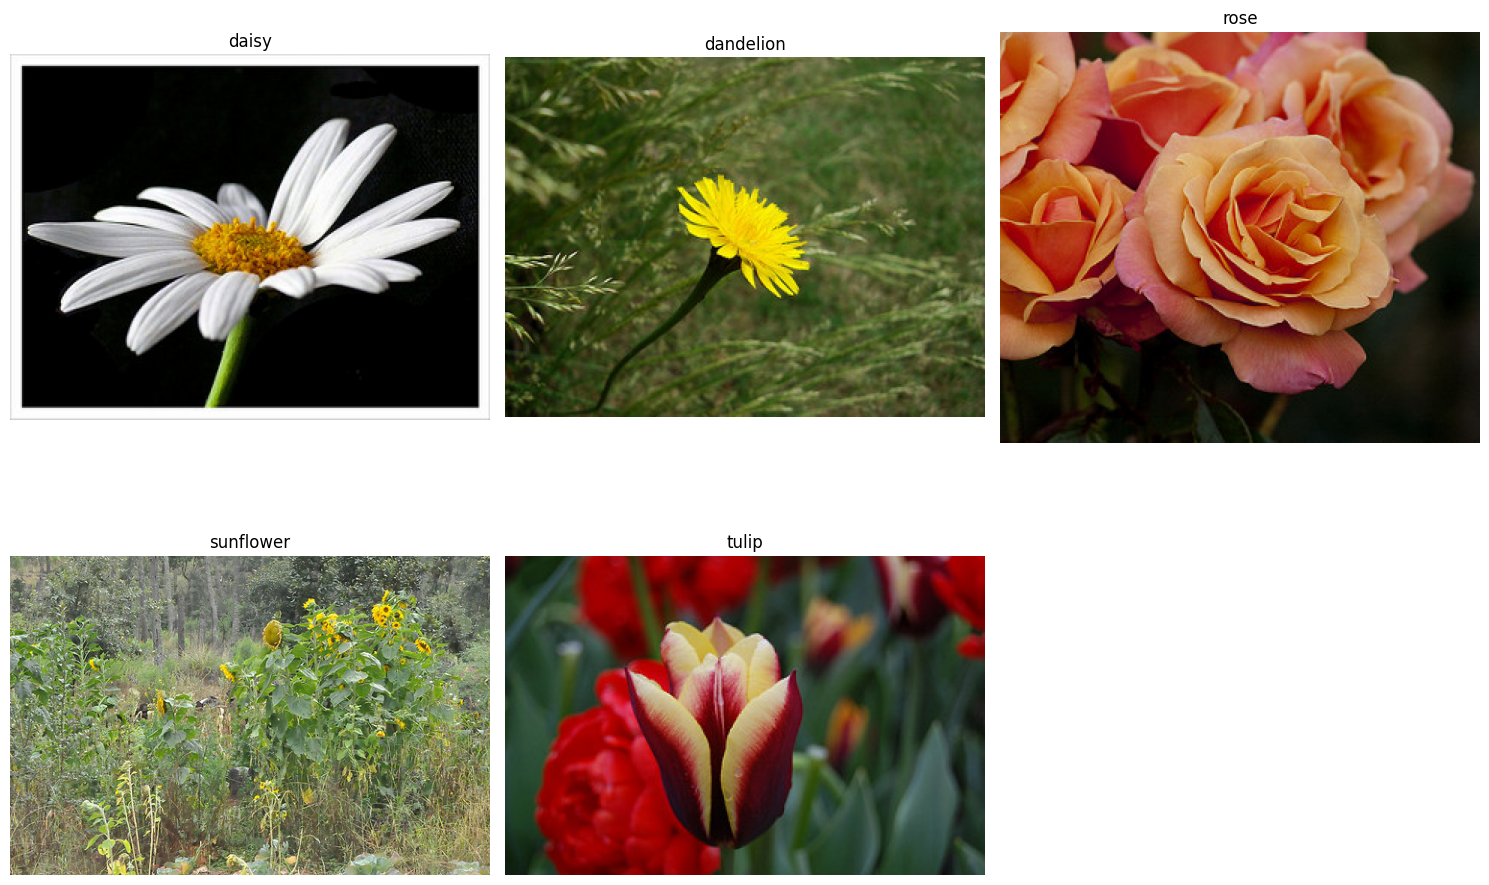

In [15]:
# Visualisasi contoh gambar dari setiap kelas
plt.figure(figsize=(15, 10))
for i, flower in enumerate(classes):
    folder_path = os.path.join(dataset_dir, flower)
    sample_image = os.path.join(folder_path, os.listdir(folder_path)[0])
    image = cv2.imread(sample_image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(flower)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
output_dir = "/content/flower_dataset_split"

# Buat folder untuk train dan test
train_dir = os.path.join(output_dir, "train")
test_dir = os.path.join(output_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Buat subfolder untuk setiap kelas di train dan test
for class_name in classes:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)

# Proporsi data untuk train dan test
train_ratio = 0.8


# Bagi dataset
for class_name in classes:
    class_folder = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_folder)
    random.shuffle(images)

    train_count = int(len(images) * train_ratio)

    train_images = images[:train_count]
    test_images = images[train_count:]

    # Pindahkan gambar ke folder train
    for img in train_images:
        src_path = os.path.join(class_folder, img)
        dst_path = os.path.join(train_dir, class_name, img)
        shutil.copy(src_path, dst_path)

    # Pindahkan gambar ke folder test
    for img in test_images:
        src_path = os.path.join(class_folder, img)
        dst_path = os.path.join(test_dir, class_name, img)
        shutil.copy(src_path, dst_path)

print("Dataset telah dibagi menjadi train dan test!")

Dataset telah dibagi menjadi train dan test!


In [17]:
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalisasi pixel (0-1)
    rotation_range=30,    # Rotasi acak
    width_shift_range=0.2,# Pergeseran horizontal
    height_shift_range=0.2,# Pergeseran vertikal
    shear_range=0.2,      # Distorsi geser
    zoom_range=0.2,       # Zoom acak
    horizontal_flip=True, # Flip horizontal
    fill_mode='nearest'   # Isi piksel kosong
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [18]:
# Load Dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 3452 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


## Modelling

In [19]:
# Load pre-trained VGG16 model without the fully connected layers
def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

    # Fine-tune the last 4 layers
    for layer in base_model.layers[:-4]:
        layer.trainable = False

    # Build the model
    model = Sequential([
        base_model,
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        GlobalAveragePooling2D(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [20]:
# Create the model
model = create_model()
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 2, 2, 64)            │         294,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2, 2, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,027,845 (57.33 MB)

 Trainable params: 7,392,453 (28.20 MB)

 Non-trainable params: 7,635,392 (29.13 MB)

In [21]:
# Callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-5
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[early_stopping, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 58s 423ms/step - accuracy: 0.4015 - loss: 1.4662 - val_accuracy: 0.6971 - val_loss: 0.9065 - learning_rate: 1.0000e-04
Epoch 2/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 279ms/step - accuracy: 0.7507 - loss: 0.7497 - val_accuracy: 0.8266 - val_loss: 0.4811 - learning_rate: 1.0000e-04
Epoch 3/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 30s 281ms/step - accuracy: 0.7847 - loss: 0.6145 - val_accuracy: 0.8254 - val_loss: 0.4631 - learning_rate: 1.0000e-04
Epoch 4/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 41s 281ms/step - accuracy: 0.8121 - loss: 0.5177 - val_accuracy: 0.8254 - val_loss: 0.4678 - learning_rate: 1.0000e-04
Epoch 5/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 306ms/step - accuracy: 0.8513 - loss: 0.4347 - val_accuracy: 0.8382 - val_loss: 0.4247 - learning_rate: 1.0000e-04
Epoch 6/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 282ms/step - accuracy: 0.8686 - loss: 0.3850 - val_accuracy: 0.8798 - val_loss: 0.3285 - learning_rate: 1.0000e-04
Epoch 7/25
108/108 ━━━━━━━━━━━━━━━━━━━━ 31s 28

## Evaluasi dan Visualisasi

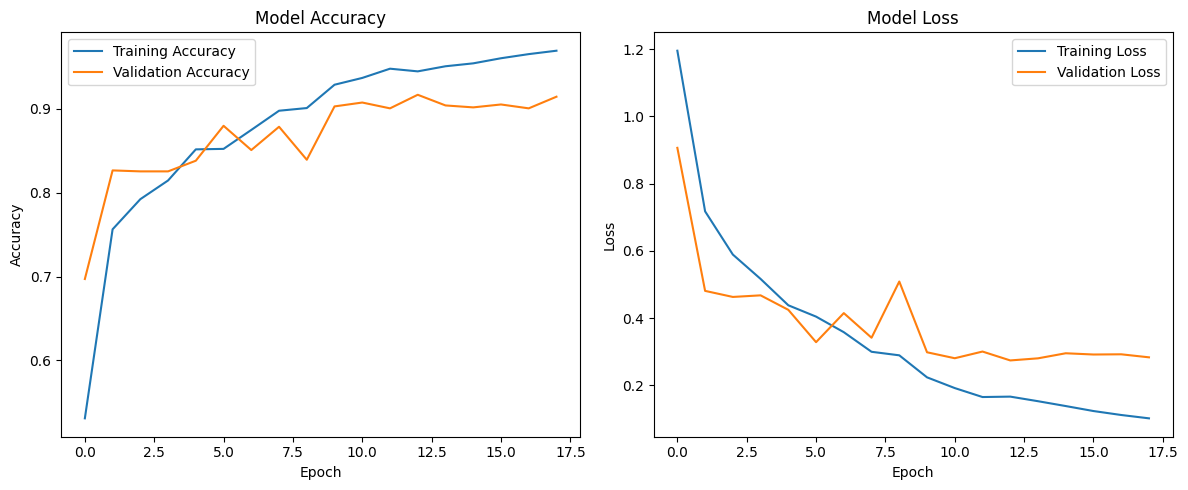

In [22]:
# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Konversi Model

In [23]:
# SavedModel
save_path = 'model'
tf.saved_model.save(model, save_path)

In [24]:
# TF-Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_dir = 'tf_lite_model'
if not os.path.exists(tflite_model_dir):
    os.makedirs(tflite_model_dir)

tflite_model_path = os.path.join(tflite_model_dir, 'model.tflite')
with open(tflite_model_path, 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmps5hy22uz'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_19')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  139442076822672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139442076821136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139442076822480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139442076822288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139442076820560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139442076821712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139442076822864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139442076819600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139442076819216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139442076817872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13944207681

In [25]:
model.save('model_name.h5')

In [26]:
# TFJS
!pip install tensorflowjs

# Convert model.h5 to model
!tensorflowjs_converter --input_format=keras model_name.h5 tfjs_model

2025-01-30 22:19:53.600780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738275593.622820    9065 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738275593.629300    9065 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


## Inference (Optional)